<a href="https://colab.research.google.com/github/Rupal-Dhurde/AI-CODTECH-TASK1/blob/main/vish_ru_data_preprocessing_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

LOADING DATASET OF CSV

In [ ]:
# Load the dataset
df = pd.read_csv("Housing.csv")


DATA DESCRIBING AND LAYOUT

In [ ]:
# Display all column names
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#head
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#tail
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
#null values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
#finding percentage
df.isnull().sum()/df.shape[0]*100

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [ ]:
#shape of data
df.shape

(545, 13)

In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include=['object']):
    print(i)
    print(df[i].unique())

mainroad
['yes' 'no']
guestroom
['no' 'yes']
basement
['no' 'yes']
hotwaterheating
['no' 'yes']
airconditioning
['yes' 'no']
prefarea
['yes' 'no']
furnishingstatus
['furnished' 'semi-furnished' 'unfurnished']


EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


DATA VISUALIZATION

price


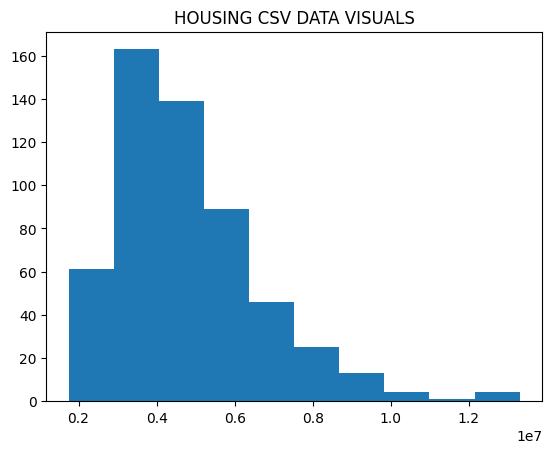

area


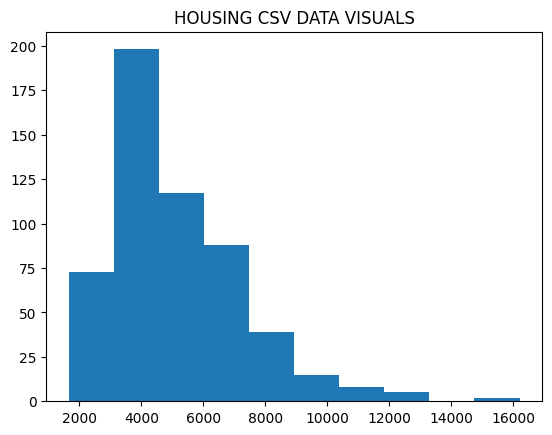

bedrooms


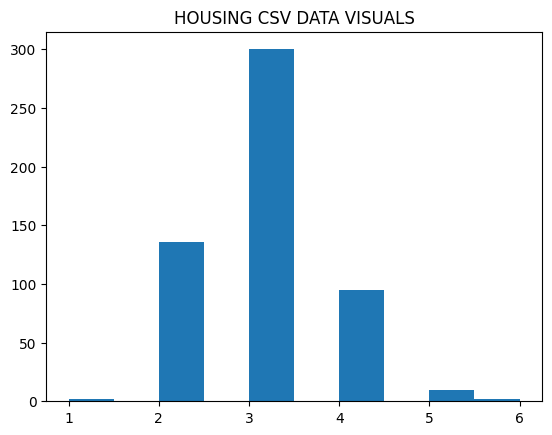

bathrooms


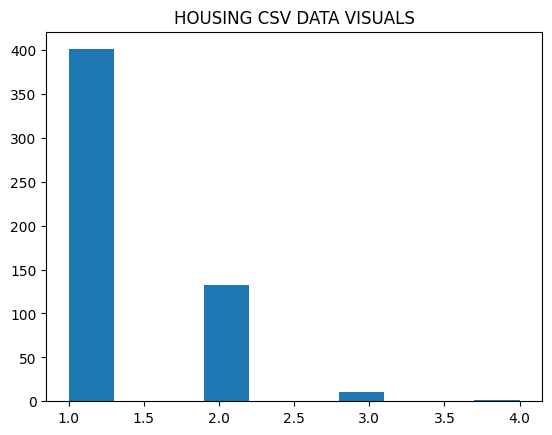

stories


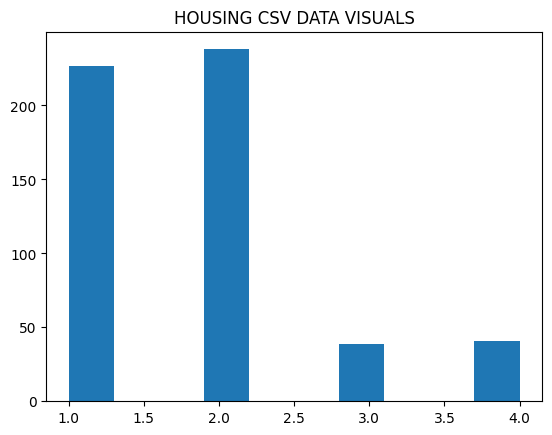

parking


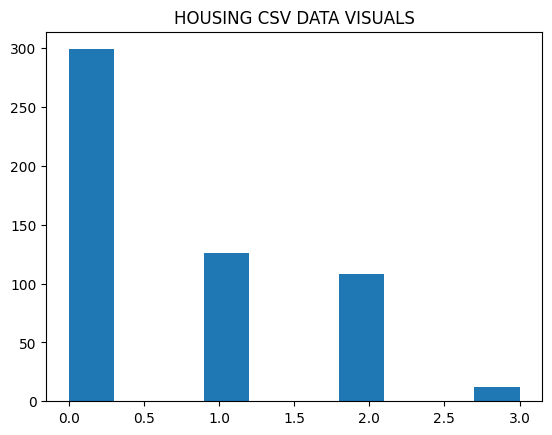

In [ ]:
#histogram to understand the distribution
for i in df.select_dtypes(include=['int64','float64']).columns:
    print(i)
    plt.title("HOUSING CSV DATA VISUALS")
    plt.hist(df[i])
    plt.show()

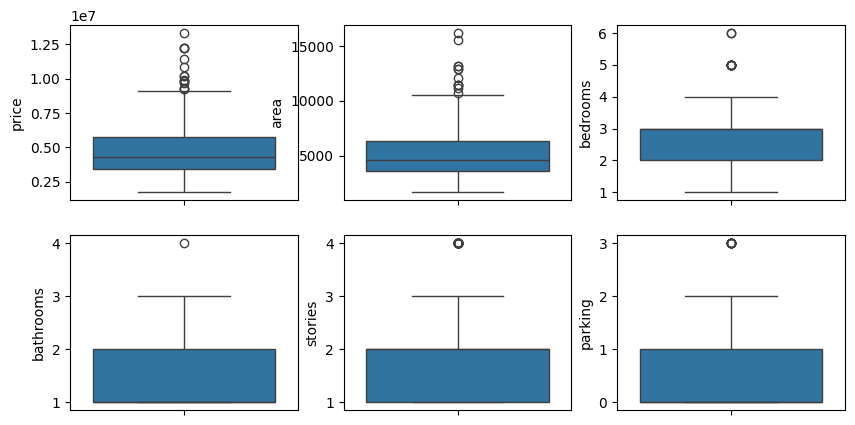

In [ ]:
#Boxplot-to-identify- Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

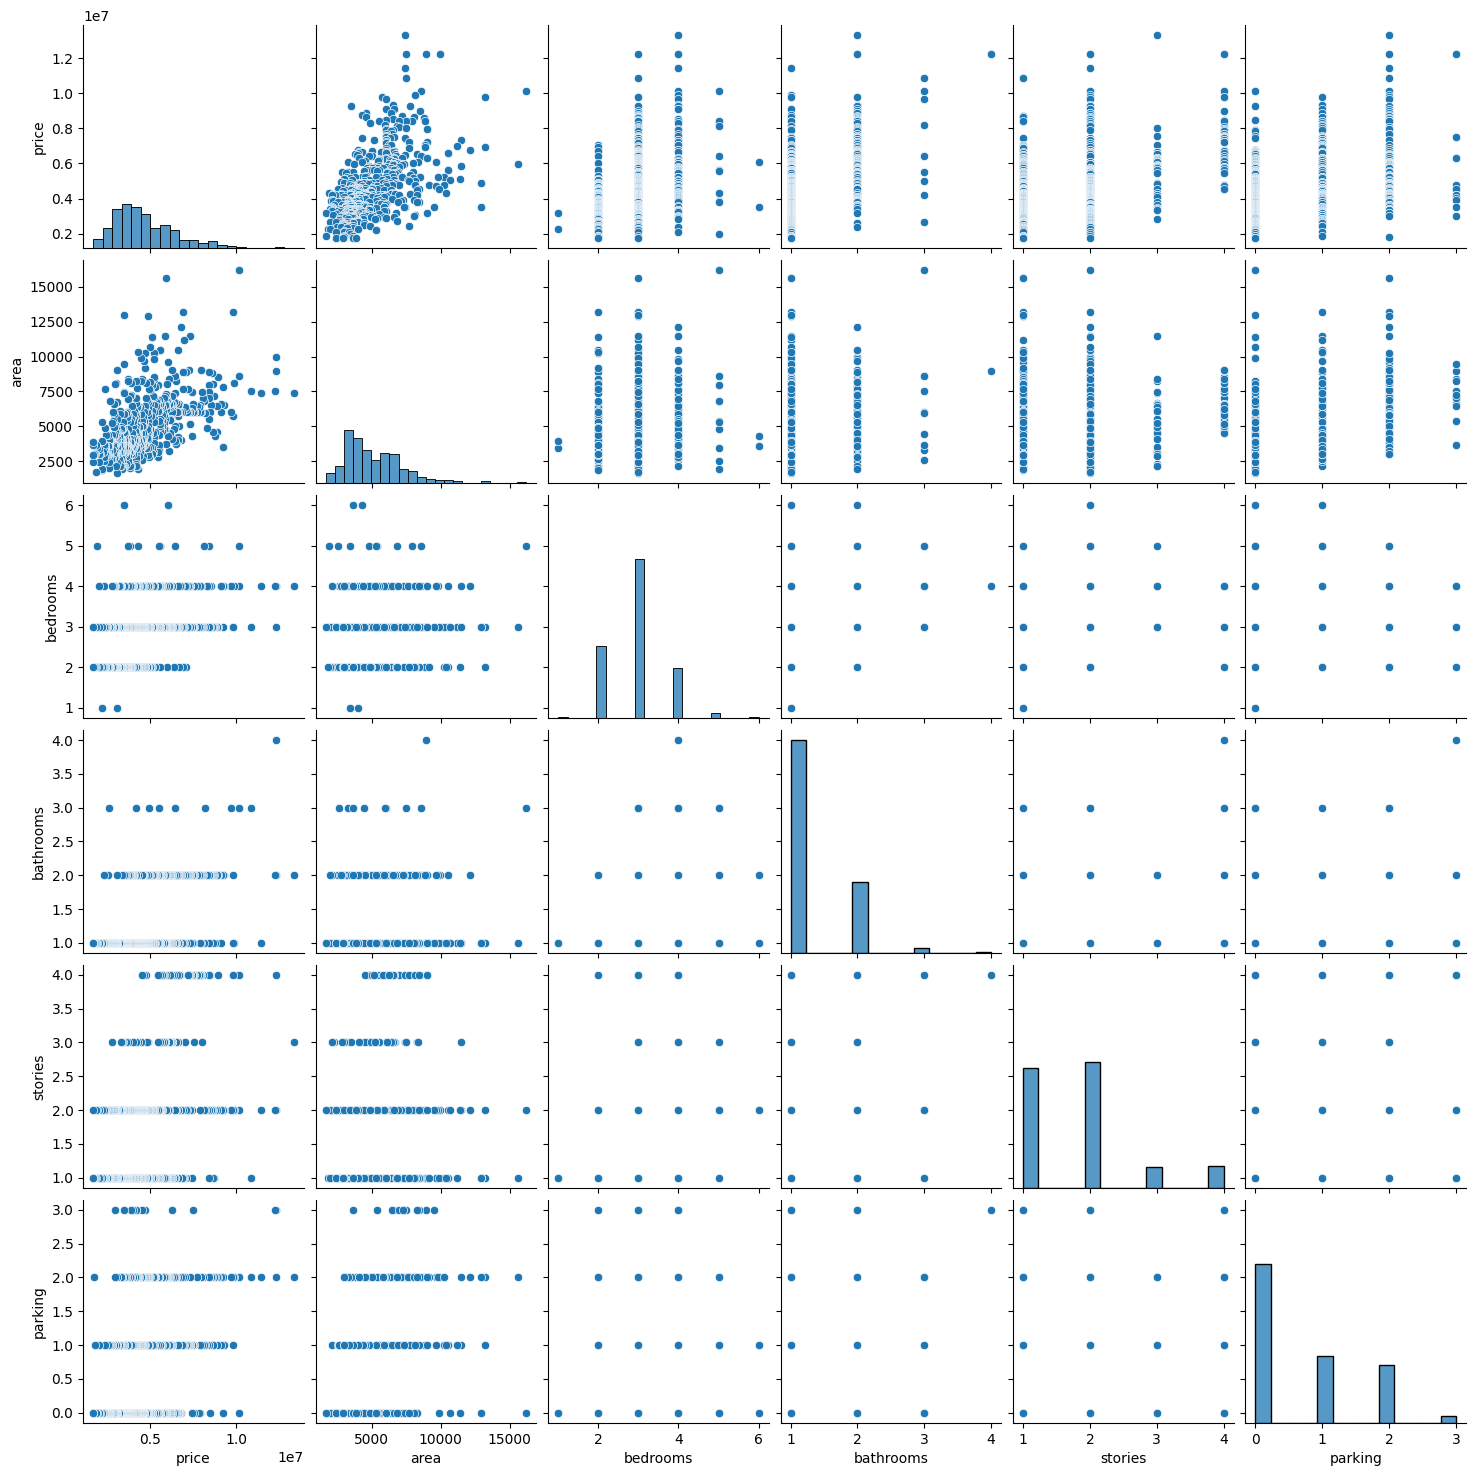

In [ ]:
#scatterplot to understand the realtionship
sns.pairplot(df)
plt.show()

In [ ]:
df.select_dtypes(include='number').columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

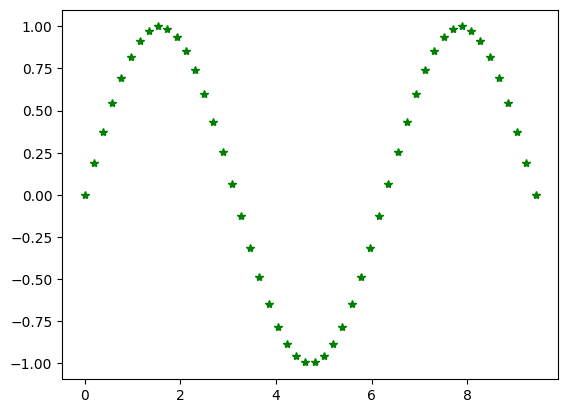

In [ ]:
# Compute the x and y coordinates for points on a sine curve
import numpy as np
x = np.linspace(0, 3 * np.pi, 50)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y, 'g*')



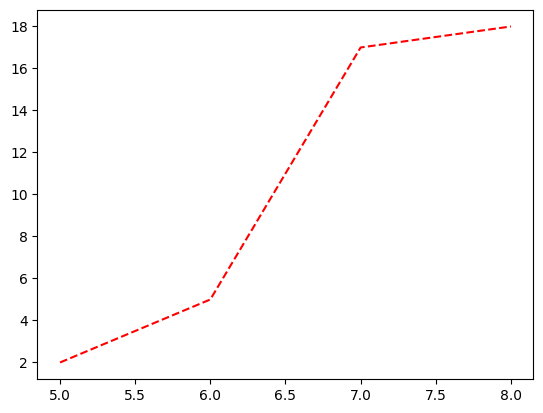

In [ ]:
x = [5,6,7,8]
y = [2, 5, 17, 18]
plt.plot(x, y, 'r--');

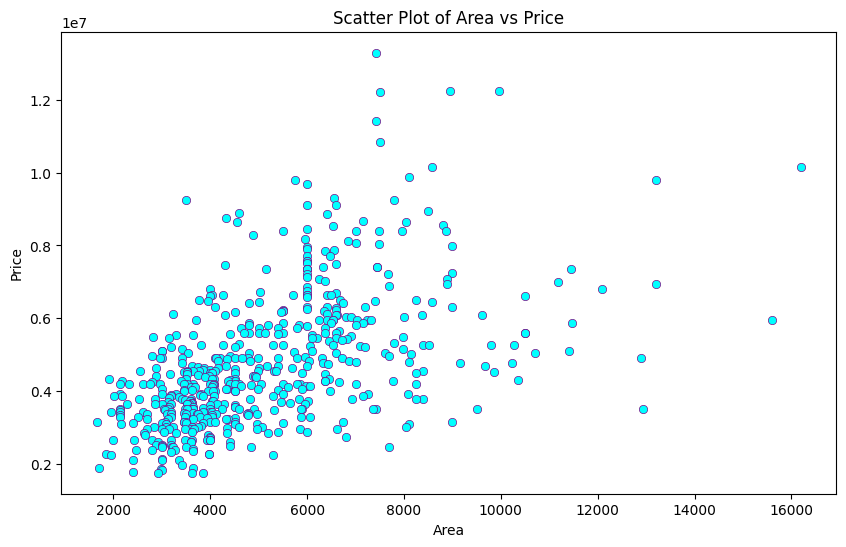

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df,  color='cyan', edgecolor="purple")
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


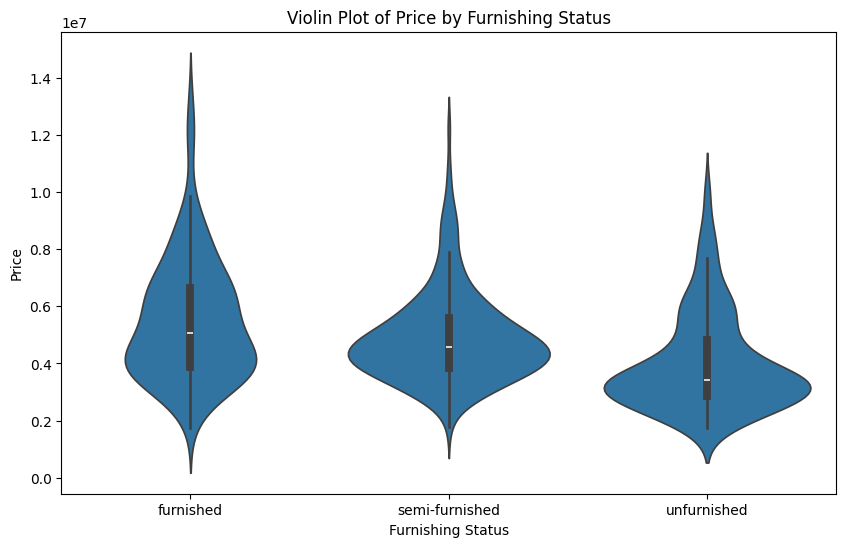

In [ ]:
#violoin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='furnishingstatus', y='price', data=df)
plt.title('Violin Plot of Price by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

[ 1  2  3  4  5  6  7  8  9 10]
[ 2  5  3  8  1 10 15  3  5 10]


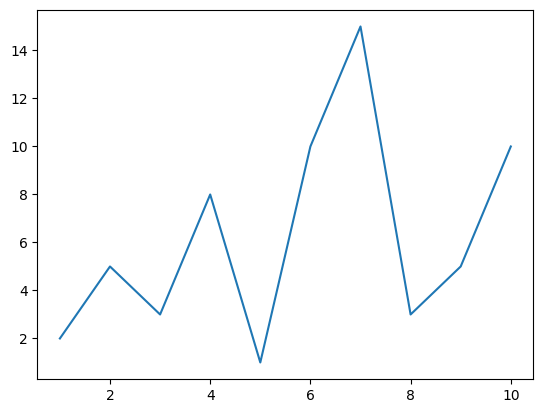

In [ ]:
# Compute the x and y coordinates for points
import numpy as np
x = np.array([1,2,3,4,5,6,7,8,9,10])
print(x)
y = np.array([2,5,3,8,1,10,15,3,5,10])
print(y)
# Plot the points using matplotlib
plt.plot(x, y)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


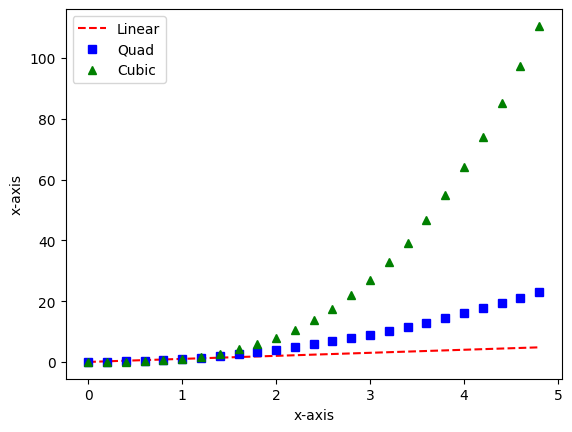

In [ ]:
d=np.arange(0.,5.,0.2)
print(d)
plt.plot(d, d,'r--',d,d**2,'bs',d,d**3,'g^',)
plt.xlabel ('x-axis')
plt.ylabel ('x-axis')
plt.legend(['Linear','Quad','Cubic'])